# Use AI-powered tools to Recommend Optimal water usage based on Crop Types, Soil, and Weather Data.

### Project Topic:

# EDA on Agricultural Data and prediction of optimal water usage based on crop types, soil, and weather data.

### Data Description:
<li>"Temperature (degree Celcius)": "Temperature in degrees Celsius (15-40\u00b0C)",
<li>"Humidity (%)": "Humidity percentage in the air (20-100%)",
<li>"Wind Speed (m/s)": "Wind speed in meters per second (0.5-15 m/s)",
<li>"Evapotranspiration (mm/day)": "Evaporation and transpiration rate (1-10 mm/day)",
<li>"Rainfall Pattern (mm)": "Rainfall in millimeters (0-200 mm)",
<li>"Soil Type": "Type of soil: Sandy, Clay, Loamy, Silty, Peaty",
<li>"Soil Moisture Levels (%)": "Soil moisture content percentage (5-40%)",
<li>"Water Retention Capacity (%)": "Percentage of water the soil can retain (10-50%)",
<li>"Drainage Properties (1=Poor, 5=Excellent)": "Drainage capacity of the soil, rated 1 (Poor) to 5 (Excellent)",
<li>"Crop Type": "Crop being cultivated: Rice, Wheat, Maize, Soybean, Cotton",
<li>"Crop Water Requirement (mm/day)": "Water needed by the crop per day (2-12 mm/day)",
<li>"Growth Stage": "Growth stage of the crop: Seedling, Vegetative, Flowering, Fruiting",
<li>"Water Requirement (mm/day)": "Final water requirement calculated for the crop based on other factors"

## <font color = 'green'> Importing necessary libraries</font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### <font color='green'> Importing and Combining Datasets</font>

In [15]:
df1= pd.read_csv('water_requirement_data.csv')
df2=pd.read_csv('synthetic_water_usage_data.csv')
print(df1.shape)
print(df2.shape)

(10000, 13)
(10000, 13)


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Temperature (°C)                           10000 non-null  float64
 1   Humidity (%)                               10000 non-null  float64
 2   Wind Speed (m/s)                           10000 non-null  float64
 3   Evapotranspiration (mm/day)                10000 non-null  float64
 4   Rainfall Pattern (mm)                      10000 non-null  float64
 5   Soil Type                                  10000 non-null  object 
 6   Soil Moisture Levels (%)                   10000 non-null  float64
 7   Water Retention Capacity (%)               10000 non-null  float64
 8   Drainage Properties (1=Poor, 5=Excellent)  10000 non-null  int64  
 9   Crop Type                                  10000 non-null  object 
 10  Crop Water Requirement 

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   temperature               10000 non-null  float64
 1   humidity                  10000 non-null  float64
 2   wind_speed                10000 non-null  float64
 3   evapotranspiration        10000 non-null  float64
 4   rainfall_pattern          10000 non-null  object 
 5   soil_type                 10000 non-null  object 
 6   soil_moisture_levels      10000 non-null  float64
 7   water_retention_capacity  10000 non-null  float64
 8   drainage_properties       10000 non-null  object 
 9   crop_type                 10000 non-null  object 
 10  crop_water_requirement    10000 non-null  float64
 11  growth_stage              10000 non-null  object 
 12  water_requirement         10000 non-null  float64
dtypes: float64(8), object(5)
memory usage: 1015.8+ KB


In [18]:
df1=df1.rename(columns={'Temperature (°C)': 'temperature', 'Humidity (%)': 'humidity', 
                        'Wind Speed (m/s)': 'wind_speed','Evapotranspiration (mm/day)':'evapotranspiration', 
                        'Rainfall Pattern (mm)':'rainfall_pattern', 'Soil Type':'soil_type', 
                        'Soil Moisture Levels (%)':'soil_moisture_levels',
                        'Water Retention Capacity (%)':'water_retention_capacity', 
                        'Drainage Properties (1=Poor, 5=Excellent)':'drainage_properties','Crop Type':'crop_type',
                        'Crop Water Requirement (mm/day)':'crop_water_requirement','Growth Stage':'growth_stage',
                        'Water Requirement (mm/day)':'water_requirement' })

In [19]:
df1.describe().T

count       mean        std        min        25%   
temperature               10000.0  27.353989   7.190753  15.000291  21.158222  \
humidity                  10000.0  60.362390  23.143564  20.012620  40.315664   
wind_speed                10000.0   7.750731   4.158219   0.500698   4.179345   
evapotranspiration        10000.0   5.488420   2.600951   1.000050   3.221715   
rainfall_pattern          10000.0  99.372761  57.856836   0.003347  48.854444   
soil_moisture_levels      10000.0  22.471766  10.074207   5.001640  13.860081   
water_retention_capacity  10000.0  30.074961  11.471362  10.005200  20.098278   
drainage_properties       10000.0   3.022900   1.412577   1.000000   2.000000   
crop_water_requirement    10000.0   7.002511   2.889619   2.002289   4.475812   
water_requirement         10000.0  11.619264   4.059433   1.280000   8.650000   

                                50%         75%         max  
temperature               27.313215   33.500159   39.992942  
humidity                  60.471742   80.518338   99.993986  
wind_speed                 7.779987   11.297771   14.998564  
evapotranspiration         5.500272    7.724046    9.998104  
rainfall_pattern          98.743438  150.095407  199.994429  
soil_moisture_levels      22.477858   31.265796   39.997889  
water_retention_capacity  30.110084   40.026922   49.995004  
drainage_properties        3.000000    4.000000    5.000000  
crop_water_requirement     7.046044    9.467741   11.999170  
water_requirement         11.560000   14.500000   23.580000

In [20]:
bins = [0, 50, 150, float('inf')]  # Bin edges: 0-50, 51-150, 151+
labels = ['Low', 'Moderate', 'High']  # Category labels

# Create a new column for rainfall categories
df1['rainfall_pattern'] = pd.cut(df1['rainfall_pattern'], bins=bins, labels=labels, right=True)

In [8]:
df2.describe().T

count       mean        std        min        25%   
temperature               10000.0  27.353989   7.190753  15.000291  21.158222  \
humidity                  10000.0  60.271793  17.357673  30.009465  45.236748   
wind_speed                10000.0  10.001008   5.735475   0.000962   5.074958   
evapotranspiration        10000.0   5.989707   2.311957   2.000044   3.974858   
soil_moisture_levels      10000.0  27.580465  12.944606   5.012156  16.424813   
water_retention_capacity  10000.0  34.961224  14.298403  10.006501  22.599920   
crop_water_requirement    10000.0  11.504598   4.900640   3.001664   7.192825   
water_requirement         10000.0  14.416114   5.394774   0.000000  10.174467   

                                50%        75%        max  
temperature               27.313215  33.500159  39.992942  
humidity                  60.353807  75.388753  89.995490  
wind_speed                10.041362  14.893477  19.998020  
evapotranspiration         6.000242   7.976930   9.998315  
soil_moisture_levels      27.689425  38.861113  49.986044  
water_retention_capacity  34.961572  47.391100  59.993755  
crop_water_requirement    11.552267  15.749134  19.996182  
water_requirement         14.516146  18.683850  25.000000

In [9]:
#combining the datasets
df = pd.concat([df1, df2], axis=0)

In [10]:
df.shape

(20000, 13)

In [11]:
df.head()

temperature   humidity  wind_speed  evapotranspiration rainfall_pattern   
0    24.363503  49.891265   11.084976            6.743301         Moderate  \
1    38.767858  46.632968    3.175424            5.133632              Low   
2    33.299849  34.092313    5.526276            9.680487              Low   
3    29.966462  68.581334   10.117569            2.970806              Low   
4    18.900466  58.129933    7.490295            6.290708              Low   

  soil_type  soil_moisture_levels  water_retention_capacity   
0     Sandy             19.897240                 35.673364  \
1     Silty             19.440264                 46.812501   
2      Clay             30.805983                 43.495237   
3      Clay              5.105964                 44.601767   
4     Sandy             38.141026                 10.108229   

  drainage_properties crop_type  crop_water_requirement growth_stage   
0                   4     Wheat               11.656577   Vegetative  \
1                   2      Rice                5.141654     Fruiting   
2                   5      Rice                5.427771    Flowering   
3                   4      Rice                2.668952     Seedling   
4                   4   Soybean                3.652293   Vegetative   

   water_requirement  
0              17.80  
1              10.58  
2              16.74  
3               4.76  
4               9.54

In [12]:
df.tail()

temperature   humidity  wind_speed  evapotranspiration rainfall_pattern   
9995    36.441400  82.622318   19.045509            8.032271         moderate  \
9996    37.437721  32.808837   14.956484            8.116215              low   
9997    38.667698  48.221908    0.389117            4.156555         moderate   
9998    24.937200  56.599200    8.020097            5.474558         moderate   
9999    20.428510  40.335889    5.147960            5.899390             high   

     soil_type  soil_moisture_levels  water_retention_capacity   
9995     loamy             31.747844                 26.106453  \
9996      clay             47.597710                 28.731312   
9997      clay             46.441333                 29.085087   
9998      clay             14.020896                 16.481613   
9999      clay              9.463352                 57.364348   

     drainage_properties crop_type  crop_water_requirement growth_stage   
9995                good     maize               15.084630     seedling  \
9996                poor     maize                4.992290   vegetative   
9997                poor     wheat               13.740037   vegetative   
9998            moderate     wheat                3.225509     seedling   
9999                good      rice                3.960593   vegetative   

      water_requirement  
9995          15.641018  
9996          10.341907  
9997          18.723048  
9998           6.158259  
9999           3.657213

### <font color='green'> Data cleaning <font>

In [13]:
df.isnull().sum()

temperature                 0
humidity                    0
wind_speed                  0
evapotranspiration          0
rainfall_pattern            0
soil_type                   0
soil_moisture_levels        0
water_retention_capacity    0
drainage_properties         0
crop_type                   0
crop_water_requirement      0
growth_stage                0
water_requirement           0
dtype: int64

In [14]:
print(df.duplicated().sum())

0


In [15]:
# Remove duplicate rows if any
#df_cleaned = df.drop_duplicates()

In [16]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['temperature', 'humidity', 'wind_speed', 'evapotranspiration',
       'soil_moisture_levels', 'water_retention_capacity',
       'crop_water_requirement', 'water_requirement'],
      dtype='object')

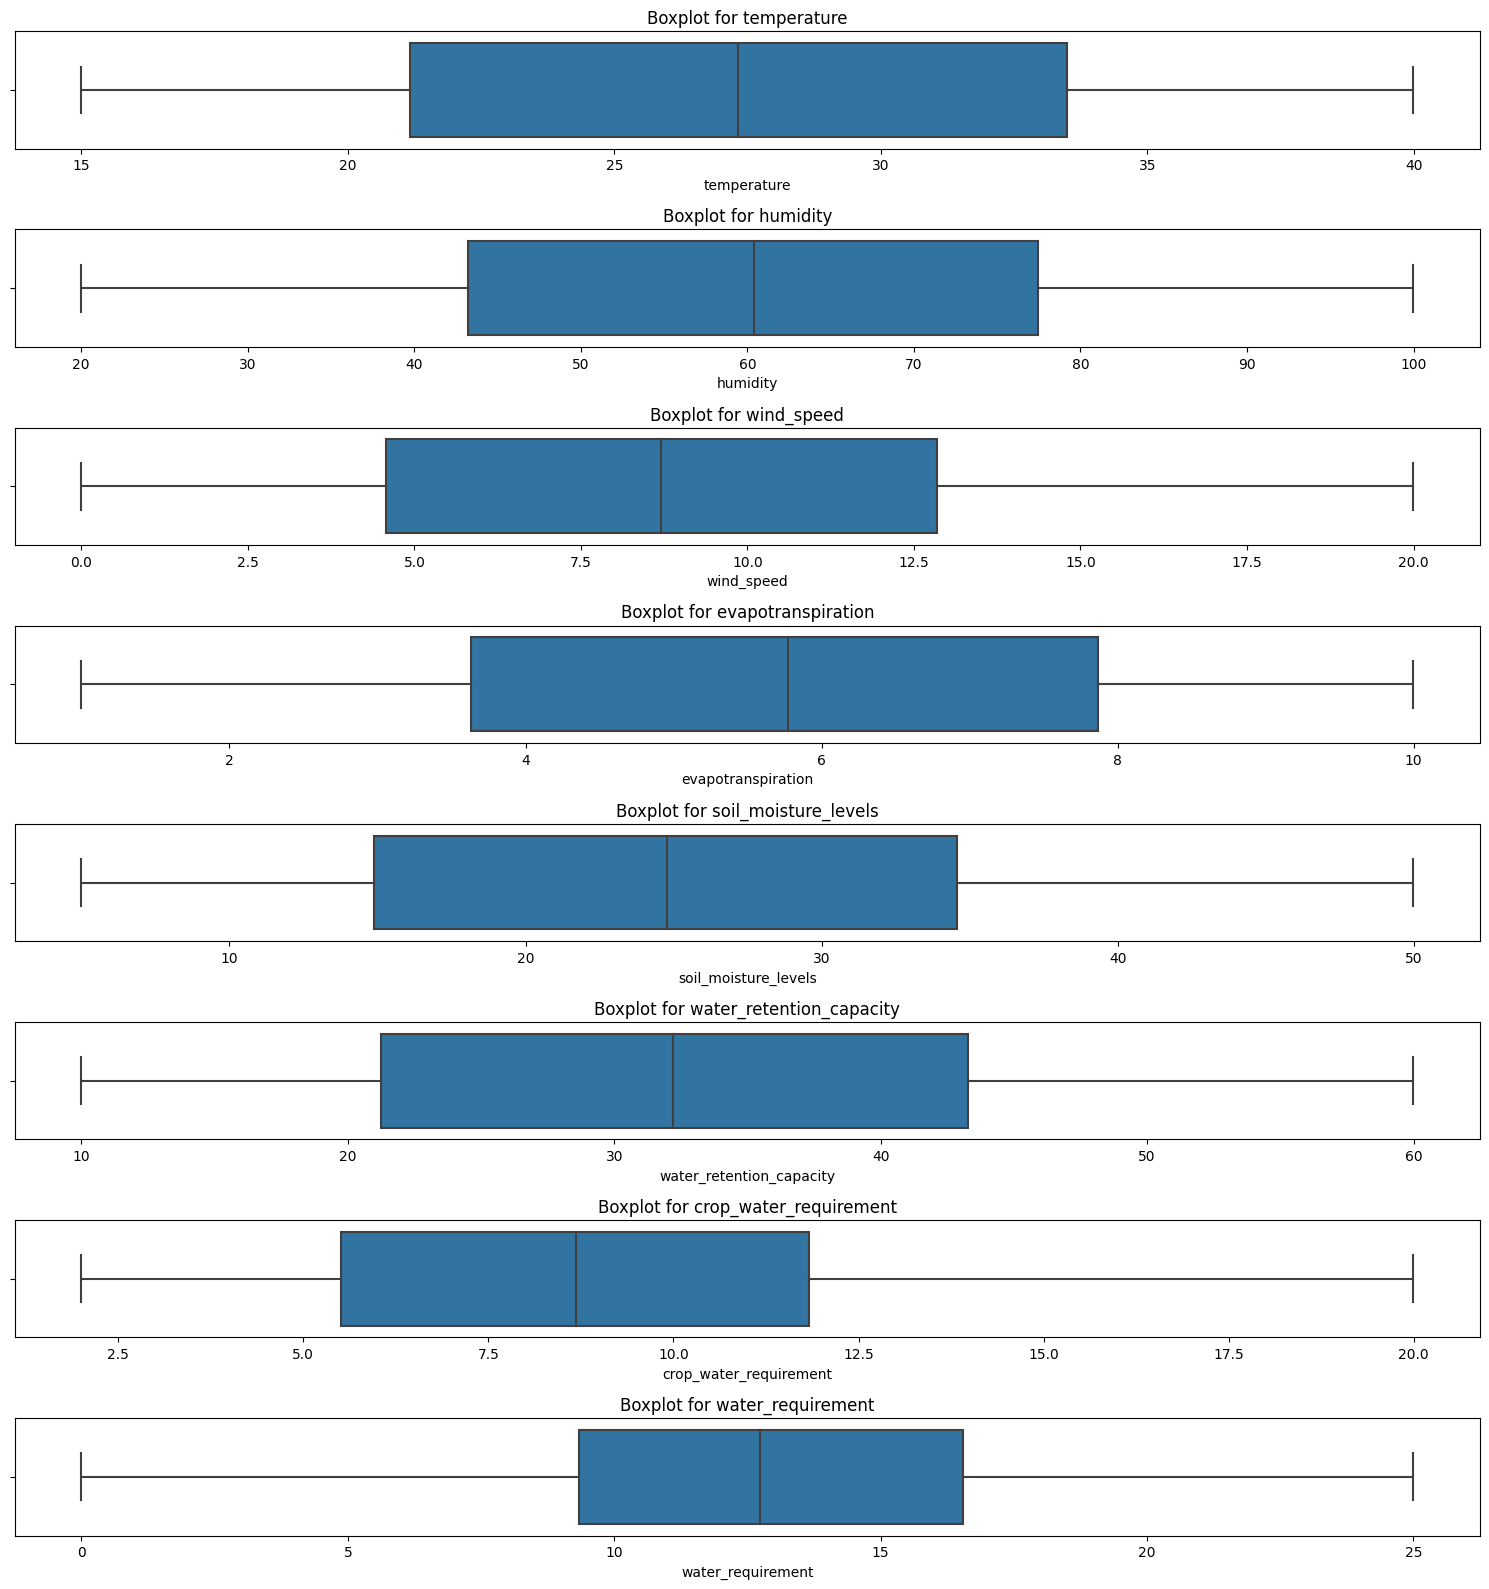

In [17]:
# Plot box plots for all numerical features
plt.figure(figsize=(15, len(numerical_columns)*2))
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 1, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.tight_layout()
plt.show()

In [18]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


for col in numerical_columns:
    outliers, lower, upper = detect_outliers(df, col)
    print(f"{col}: {len(outliers)} outliers detected")
    df = remove_outliers(df, col)

temperature: 0 outliers detected
humidity: 0 outliers detected
wind_speed: 0 outliers detected
evapotranspiration: 0 outliers detected
soil_moisture_levels: 0 outliers detected
water_retention_capacity: 0 outliers detected
crop_water_requirement: 0 outliers detected
water_requirement: 0 outliers detected


In [19]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Count unique categories in each categorical column
category_counts = {col: df[col].nunique() for col in categorical_columns}

# Print the results
for col, count in category_counts.items():
    print(f"{col}: {count} unique categories")


rainfall_pattern: 6 unique categories
soil_type: 8 unique categories
drainage_properties: 8 unique categories
crop_type: 8 unique categories
growth_stage: 8 unique categories


In [20]:
print(df['soil_type'].unique()) 
print(df['rainfall_pattern'].unique())
print(df['drainage_properties'].unique())
print(df['crop_type'].unique())
print(df['growth_stage'].unique())

['Sandy' 'Silty' 'Clay' 'Peaty' 'Loamy' 'loamy' 'clay' 'sandy']
['Moderate' 'Low' 'High' 'low' 'moderate' 'high']
[4 2 5 3 1 'good' 'poor' 'moderate']
['Wheat' 'Rice' 'Soybean' 'Cotton' 'Maize' 'maize' 'rice' 'wheat']
['Vegetative' 'Fruiting' 'Flowering' 'Seedling' 'seedling' 'vegetative'
 'maturity' 'reproductive']


In [21]:
df['soil_type']=df['soil_type'].str.lower()
df['rainfall_pattern']=df['rainfall_pattern'].str.lower()
df['crop_type']=df['crop_type'].str.lower()
df['growth_stage']=df['growth_stage'].str.lower()

In [22]:
mapping = {
    1: 'poor',
    2: 'poor',
    3: 'moderate',
    4: 'good',
    5: 'good'
}
# Replace numeric values using the mapping
df['drainage_properties'] = df['drainage_properties'].replace(mapping)
df

temperature   humidity  wind_speed  evapotranspiration rainfall_pattern   
0       24.363503  49.891265   11.084976            6.743301         moderate  \
1       38.767858  46.632968    3.175424            5.133632              low   
2       33.299849  34.092313    5.526276            9.680487              low   
3       29.966462  68.581334   10.117569            2.970806              low   
4       18.900466  58.129933    7.490295            6.290708              low   
...           ...        ...         ...                 ...              ...   
9995    36.441400  82.622318   19.045509            8.032271         moderate   
9996    37.437721  32.808837   14.956484            8.116215              low   
9997    38.667698  48.221908    0.389117            4.156555         moderate   
9998    24.937200  56.599200    8.020097            5.474558         moderate   
9999    20.428510  40.335889    5.147960            5.899390             high   

     soil_type  soil_moisture_levels  water_retention_capacity   
0        sandy             19.897240                 35.673364  \
1        silty             19.440264                 46.812501   
2         clay             30.805983                 43.495237   
3         clay              5.105964                 44.601767   
4        sandy             38.141026                 10.108229   
...        ...                   ...                       ...   
9995     loamy             31.747844                 26.106453   
9996      clay             47.597710                 28.731312   
9997      clay             46.441333                 29.085087   
9998      clay             14.020896                 16.481613   
9999      clay              9.463352                 57.364348   

     drainage_properties crop_type  crop_water_requirement growth_stage   
0                   good     wheat               11.656577   vegetative  \
1                   poor      rice                5.141654     fruiting   
2                   good      rice                5.427771    flowering   
3                   good      rice                2.668952     seedling   
4                   good   soybean                3.652293   vegetative   
...                  ...       ...                     ...          ...   
9995                good     maize               15.084630     seedling   
9996                poor     maize                4.992290   vegetative   
9997                poor     wheat               13.740037   vegetative   
9998            moderate     wheat                3.225509     seedling   
9999                good      rice                3.960593   vegetative   

      water_requirement  
0             17.800000  
1             10.580000  
2             16.740000  
3              4.760000  
4              9.540000  
...                 ...  
9995          15.641018  
9996          10.341907  
9997          18.723048  
9998           6.158259  
9999           3.657213  

[20000 rows x 13 columns]

### <font color= 'green'> Exporting the cleaned data

In [23]:
df.to_csv('clean_water_requirement_data.csv', index=False)

# <font color='green'> Exploratory Data Analysis <font>

### <font color='green'> Univariant Analysis<font>

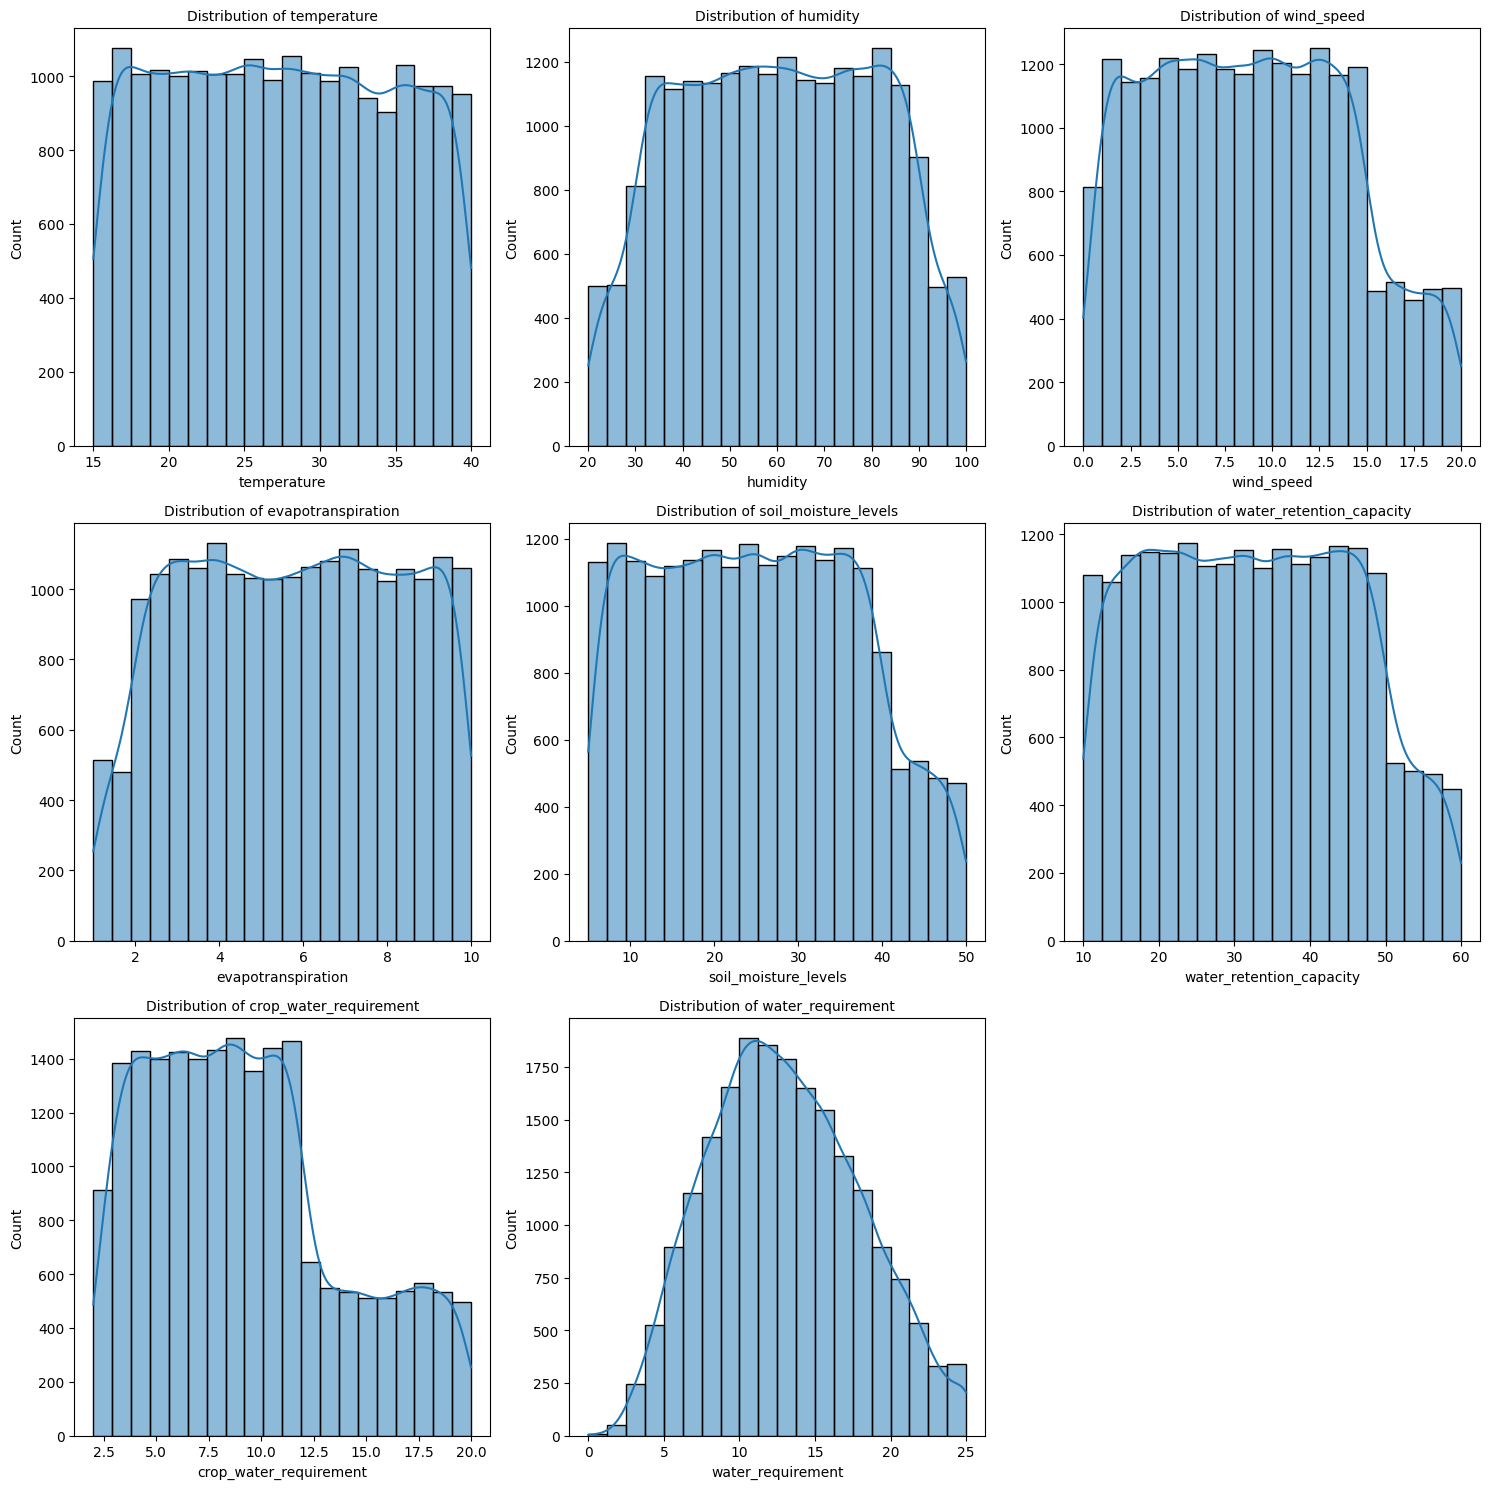

In [24]:
# Plot histograms for each numerical column
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) + 2) // 3, 3, i)  # Create subplots
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}', fontsize=10)
    plt.tight_layout()
plt.show()

### General Observations:
1. **Temperature**:
   - The distribution appears uniform, with a relatively flat frequency across the range. This suggests temperature values are evenly distributed within the range.

2. **Humidity**:
   - The distribution has a slightly bell-shaped pattern, indicating most observations fall in the middle range (40–80%), with fewer instances at the extremes.

3. **Wind Speed**:
   - The distribution is skewed to the right, meaning lower wind speeds are more frequent, with a gradual decline in frequency as wind speed increases.

4. **Evapotranspiration**:
   - Shows a fairly uniform distribution, indicating evapotranspiration levels are spread evenly across the observed range.

5. **Soil Moisture Levels**:
   - The distribution is left-skewed, with most values concentrated at higher soil moisture levels (30–50), indicating a general trend of higher moisture in the soil.

6. **Water Retention Capacity**:
   - The distribution is also left-skewed, with a higher frequency of higher retention capacities (40–60), suggesting soils in the dataset have good water-holding characteristics.

7. **Crop Water Requirement**:
   - The distribution is multimodal, with peaks at lower (5–10) and middle (15–20) ranges. This may indicate variability in water requirements depending on crop type or other factors.

8. **Water Requirement**:
   - This distribution is approximately normal, with a clear peak around 12–15 and symmetry around the mean. It suggests that most crops have a moderate water requirement.

---

### Insights:
- The **normal distribution** of water requirements suggests it is a key variable for irrigation and water management planning, with the mean value being a central focus for optimization.
- The **multimodal crop water requirement** distribution may reflect variability in crops' water needs, emphasizing the need for crop-specific water management strategies.
- The **left-skewness** in soil moisture and water retention highlights that most soils in the dataset are well-suited for water retention, possibly indicating fertile or clay-rich soils.
- The **uniform distributions** of temperature and evapotranspiration suggest that the environmental conditions are consistent across observations.

---

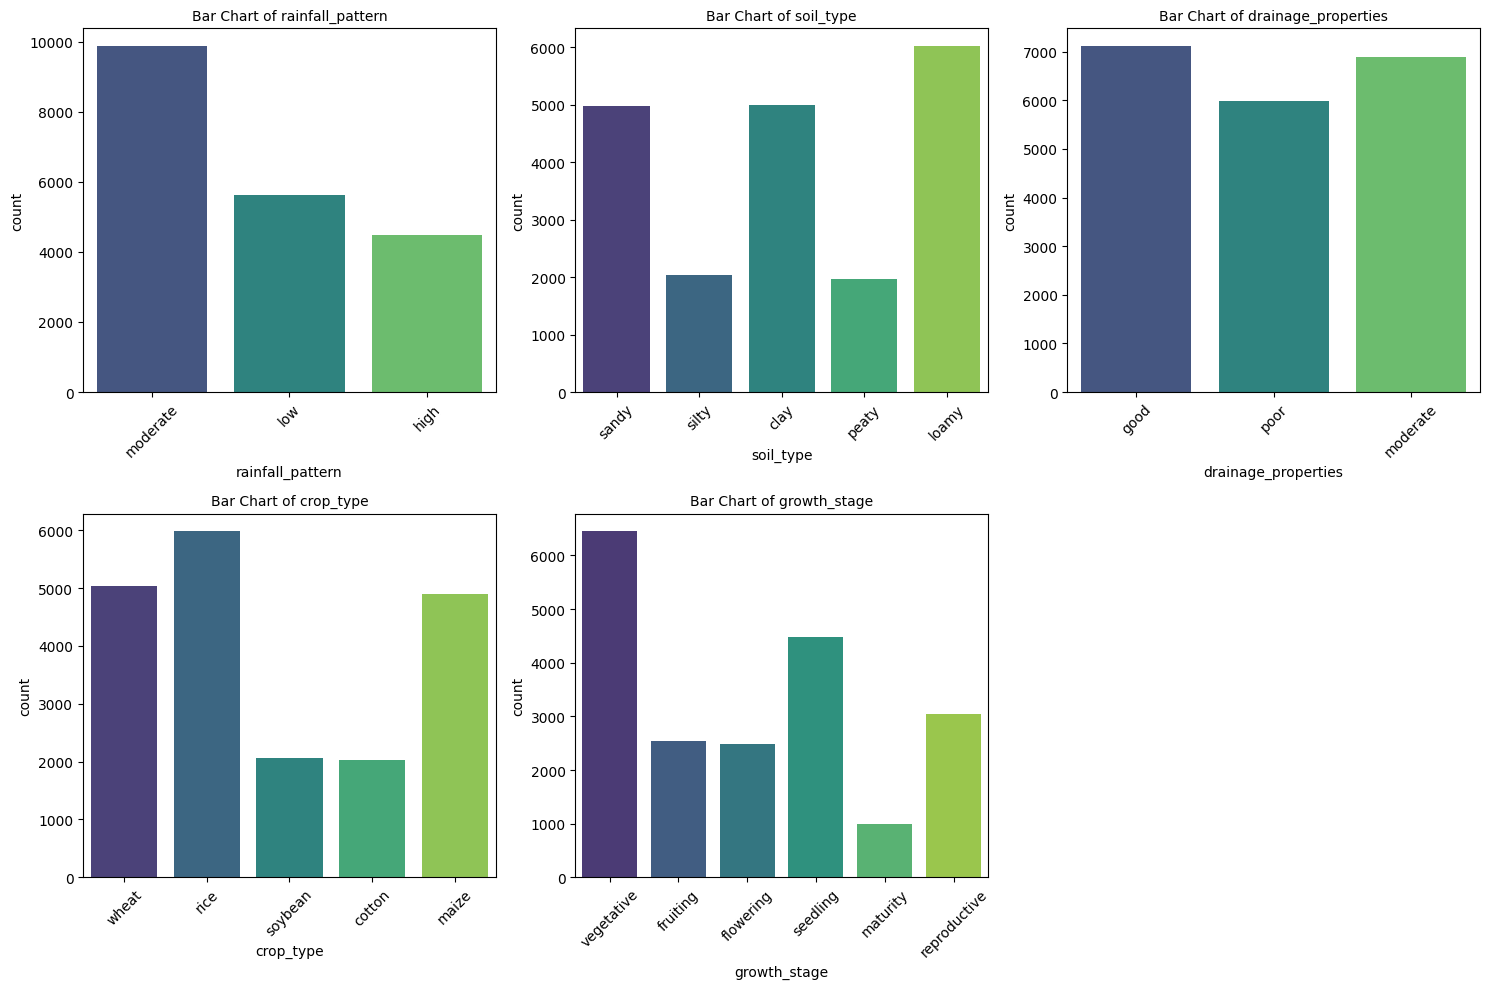

In [25]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot((len(categorical_columns) + 2) // 3, 3, i)  # Create subplots
    sns.countplot(data=df, x=column, palette='viridis')
    plt.title(f'Bar Chart of {column}', fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

### **1. Rainfall Pattern**:
- Most areas have "moderate" rainfall.
- Fewer areas have "low" or "high" rainfall.
- **Meaning**: Moderate rainfall is common in this dataset, so crops are likely suited to these conditions.

---

### **2. Soil Type**:
- Most soils are **loamy**, followed by **sandy** and **clay**.
- **Silty** and **peaty** soils are less common.
- **Meaning**: Loamy soil is great for farming, so it’s likely the focus of this dataset.

---

### **3. Drainage Properties**:
- Most soils have **good** or **moderate** drainage.
- Few areas have **poor** drainage.
- **Meaning**: Farming here is easier because good drainage prevents waterlogging.

---

### **4. Crop Type**:
- **Rice** is the most common crop, followed by **maize** and **wheat**.
- Fewer areas grow **cotton** and **soybean**.
- **Meaning**: The dataset focuses on staple crops that are widely grown.

---

### **5. Growth Stage**:
- Most crops are in the **vegetative stage**, with many also in the **maturity** and **reproductive stages**.
- Few crops are in the **seedling** or **fruiting stages**.
- **Meaning**: The dataset mostly looks at crops in active growth stages, not early ones.

---

### Summary:
- This dataset focuses on areas with good rainfall, fertile loamy soil, and crops like rice, maize, and wheat.
- These conditions make farming productive, and most crops are at stages where they need the most care.

## Bivariant Analysis

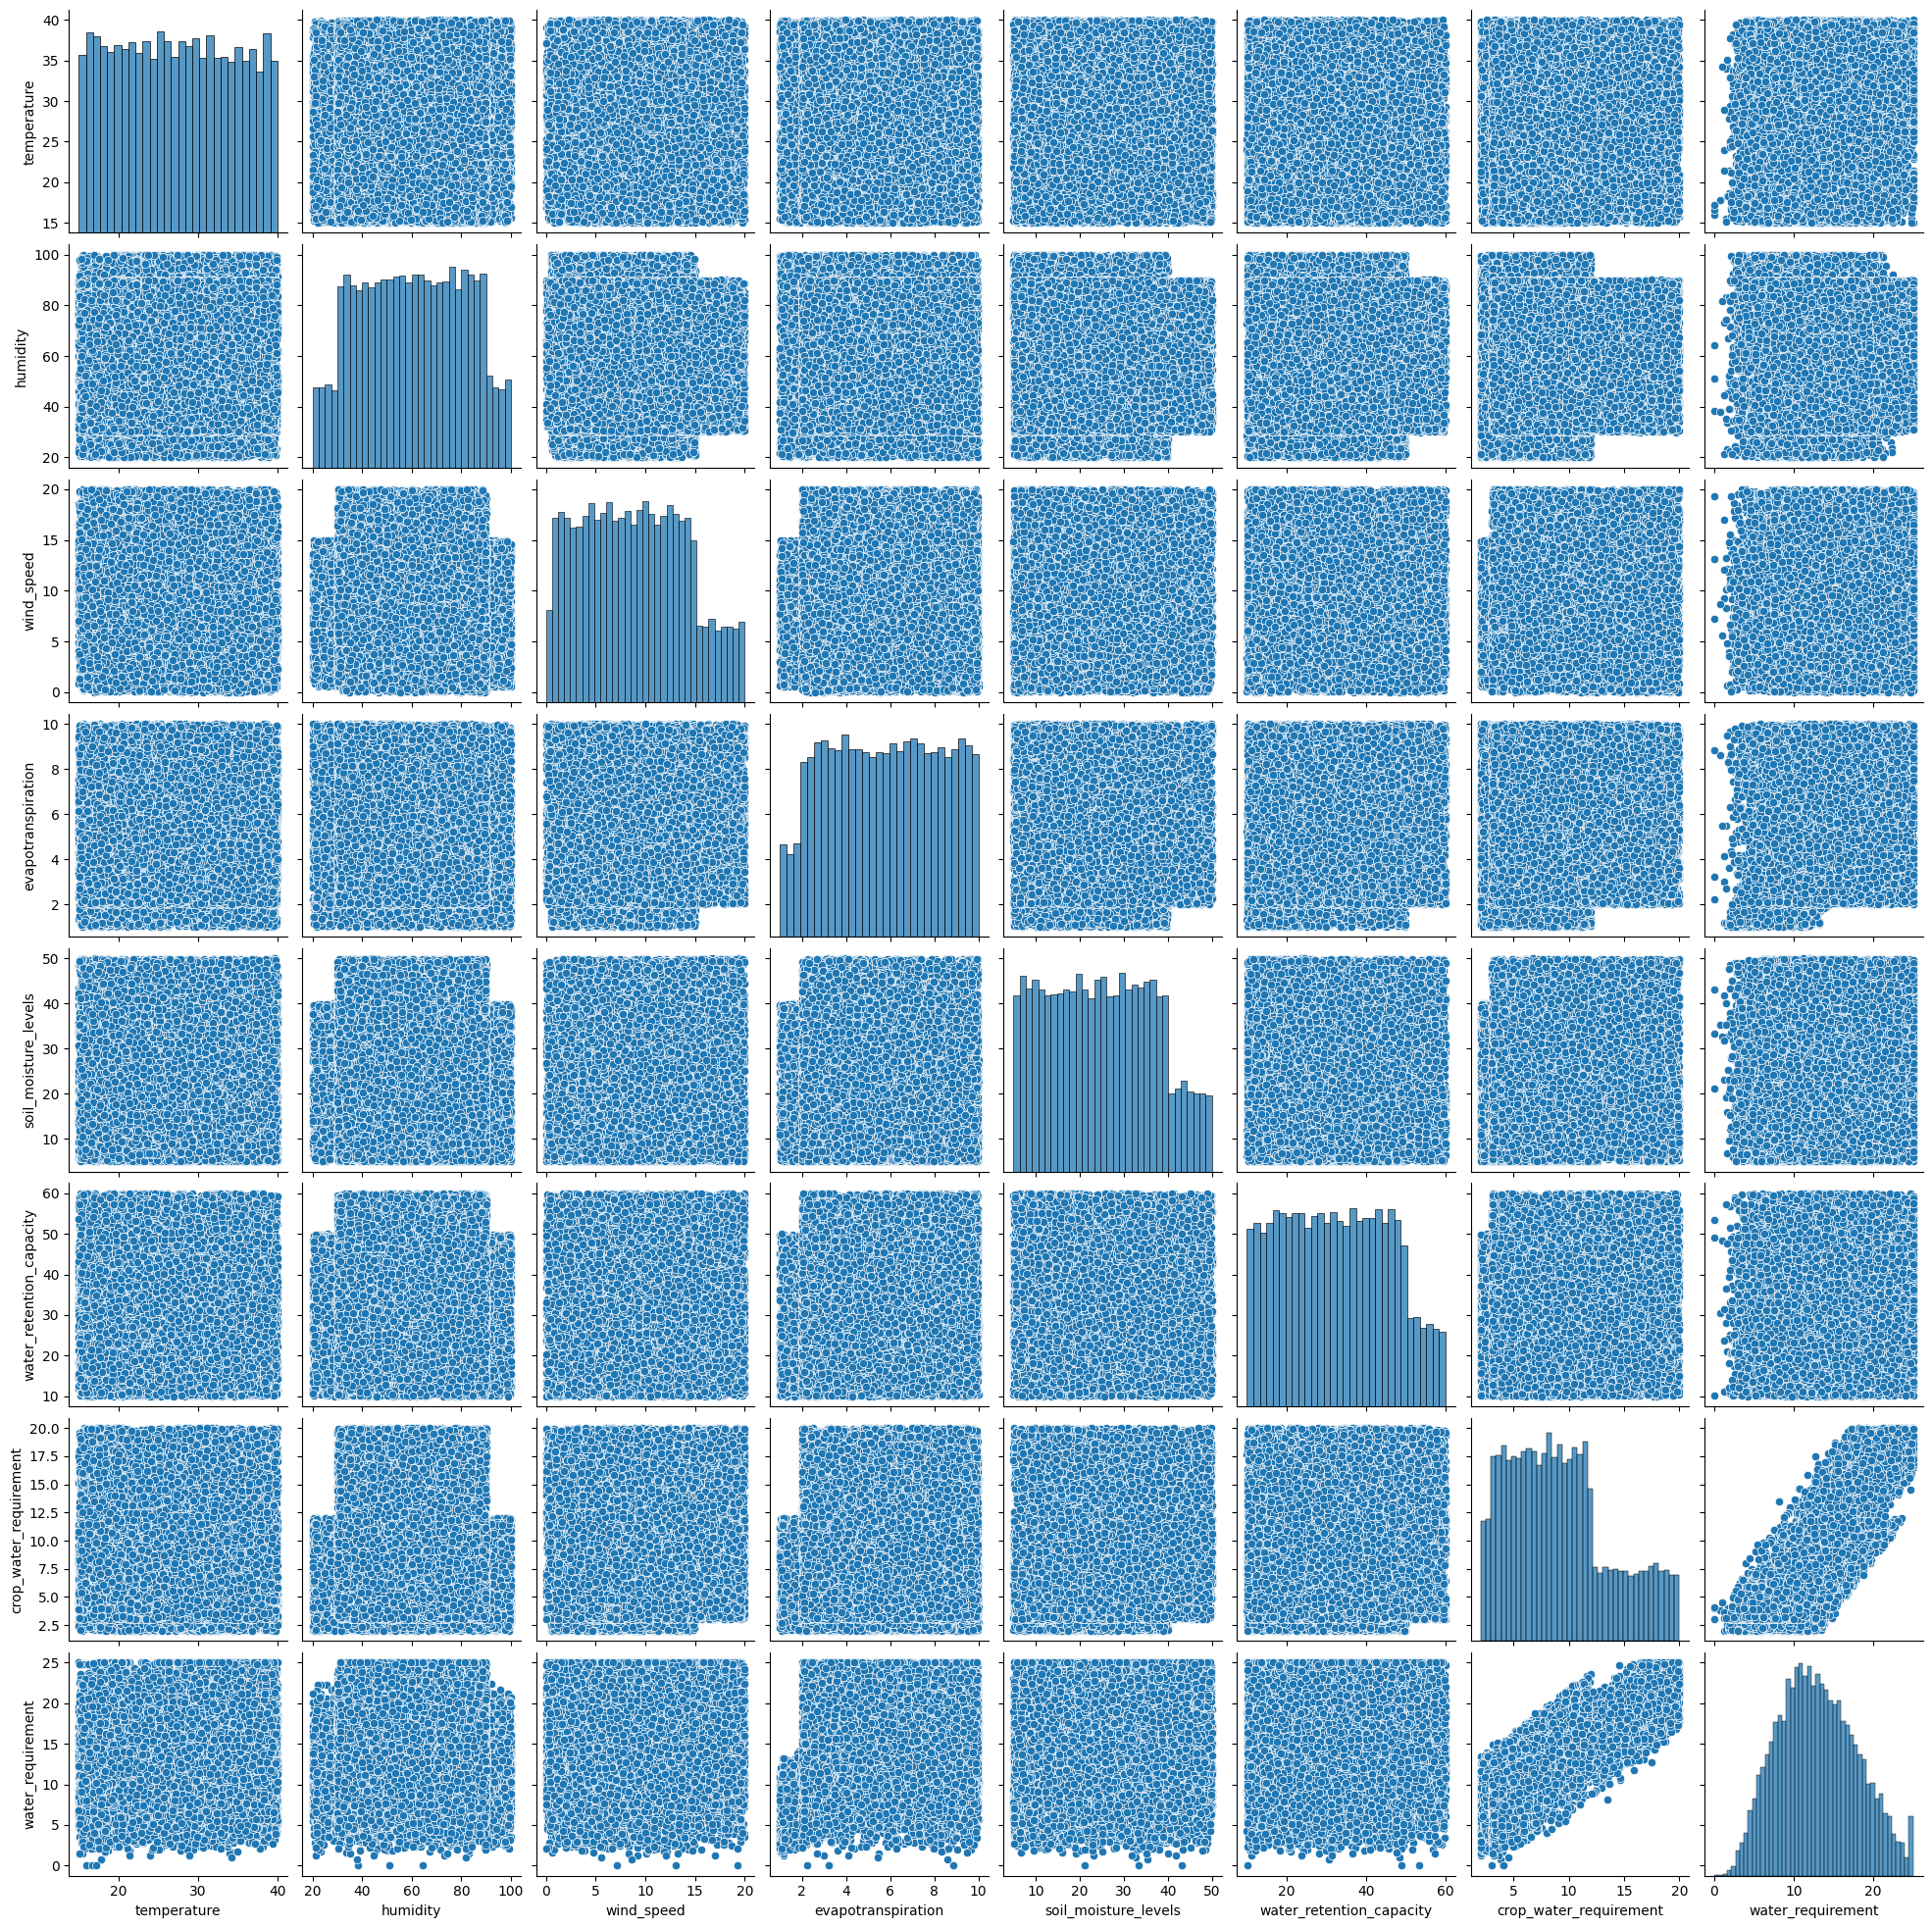

In [26]:
sns.pairplot(df)
plt.show()


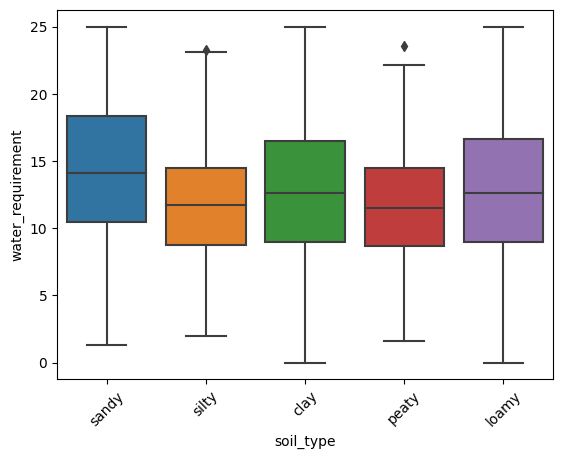

In [27]:
sns.boxplot(data=df, x='soil_type', y='water_requirement')
plt.xticks(rotation=45)
plt.show()

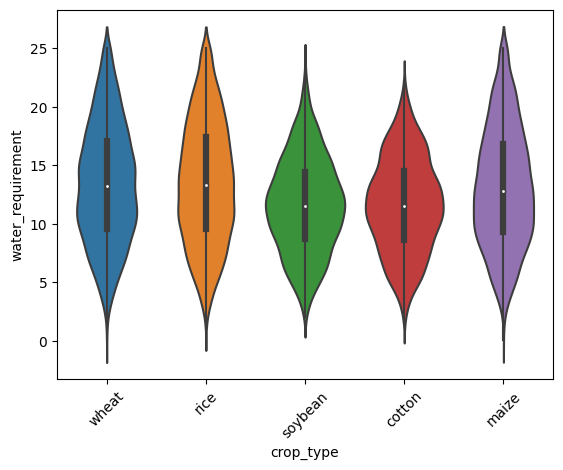

In [28]:
sns.violinplot(data=df, x='crop_type', y='water_requirement')
plt.xticks(rotation=45)
plt.show()


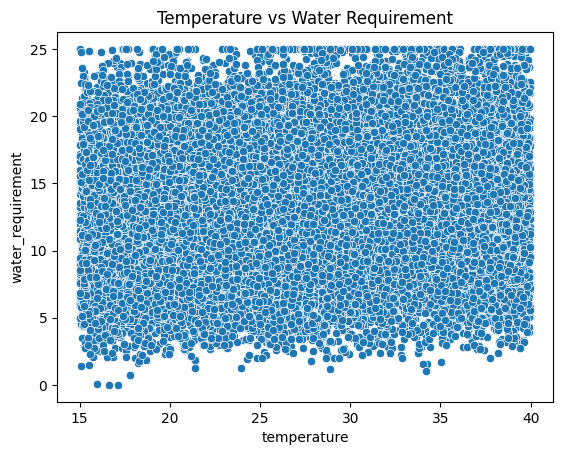

In [29]:
sns.scatterplot(data=df, x='temperature', y='water_requirement')
plt.title('Temperature vs Water Requirement')
plt.show()

In [30]:
correlation_matrix = df[numerical_columns].corr()
print(correlation_matrix['water_requirement'])

temperature                 0.082502
humidity                   -0.016958
wind_speed                  0.062858
evapotranspiration          0.306207
soil_moisture_levels        0.063450
water_retention_capacity    0.063427
crop_water_requirement      0.840243
water_requirement           1.000000
Name: water_requirement, dtype: float64


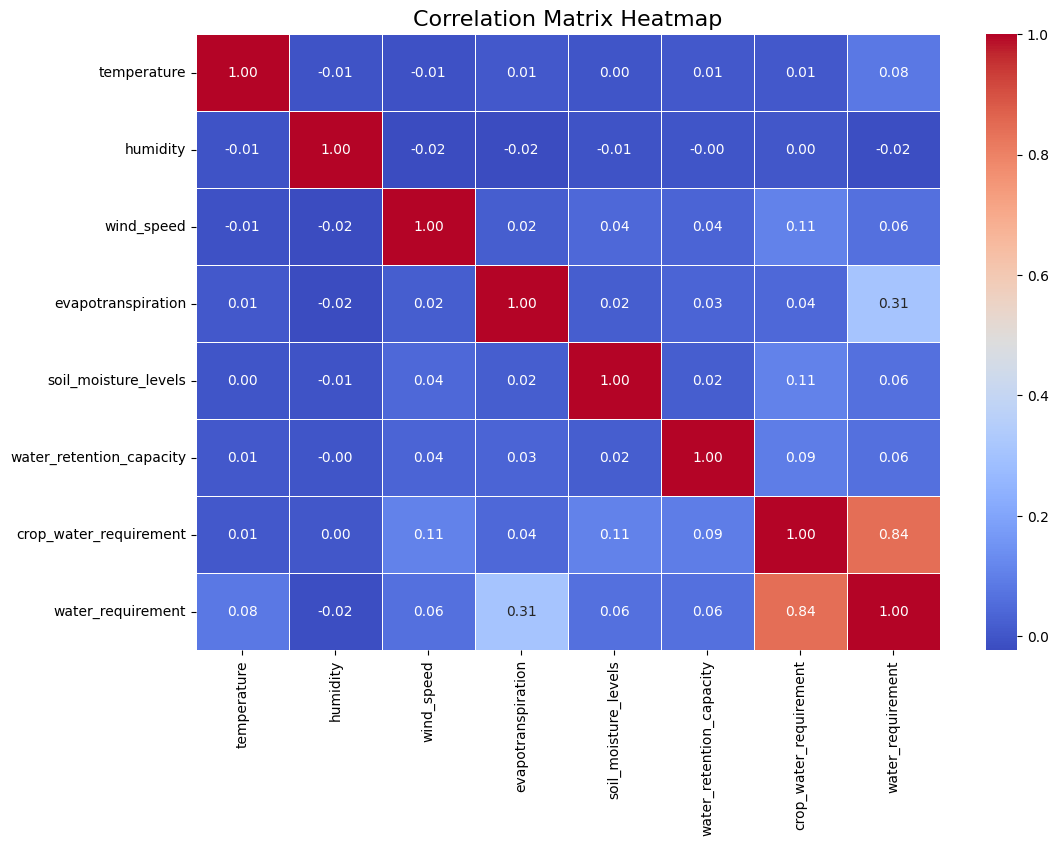

In [31]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

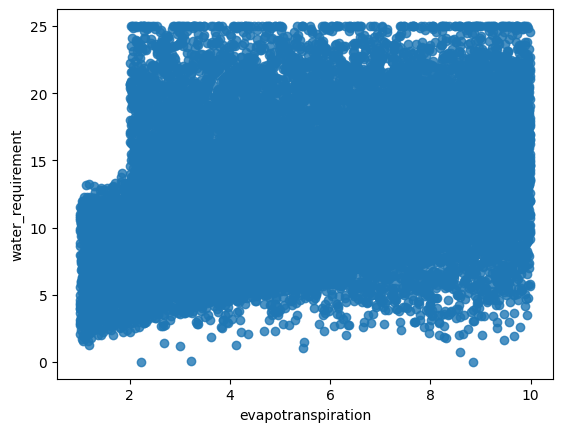

In [32]:
sns.regplot(data=df, x='evapotranspiration', y='water_requirement')
plt.show()


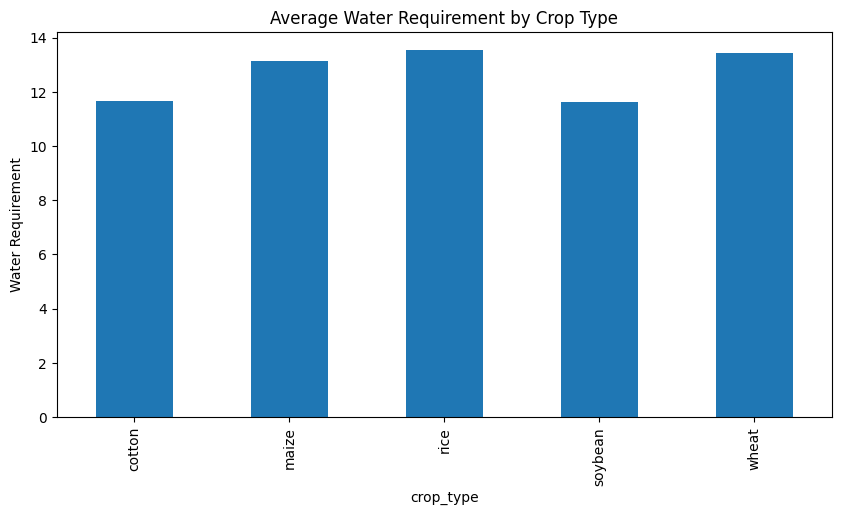

In [33]:
df.groupby('crop_type')['water_requirement'].mean().plot(kind='bar', figsize=(10, 5))
plt.title('Average Water Requirement by Crop Type')
plt.ylabel('Water Requirement')
plt.show()


The average water requirement is high for rice

### <font color='green'> Hypotheses for the ANOVA Test:
1. **Null Hypothesis (\(H_0\))**: The mean `water_requirement` is the same across all `soil_type` groups.
2. **Alternative Hypothesis (\(H_a\))**: At least one `soil_type` group has a significantly different mean `water_requirement`.

In [34]:
from scipy.stats import f_oneway

# Example: ANOVA for Water Requirement across Soil Types
soil_groups = [group['water_requirement'].values for _, group in df.groupby('soil_type')]
stat, p = f_oneway(*soil_groups)
print(f'ANOVA F-Statistic: {stat}, p-value: {p}')


ANOVA F-Statistic: 197.66963575159622, p-value: 1.5681741857370912e-166


#### Key Observations:
1. **F-Statistic**:
   - The high F-statistic (197.67) indicates a significant variance between the group means compared to the variance within the groups.
   - This suggests differences in `water_requirement` across `soil_type` groups.

2. **p-value**:
   - The p-value (1.57 X 10^{-166}) is far smaller than any standard significance level (e.g., \(\alpha = 0.05\)).
   - This indicates extremely strong evidence against the null hypothesis.

---

#### Conclusion:
- Since the **p-value is much smaller than 0.05**, we **reject the null hypothesis**.
- This provides strong evidence that the **mean `water_requirement` differs significantly across different `soil_type` groups**.

---

#### Practical Interpretation:
- Different soil types have varying water retention capacities or support crops with different water needs.
- The significant difference in water requirements implies that irrigation strategies or crop management practices should be tailored based on soil type.

In [35]:
pd.crosstab(df['soil_type'], df['crop_type'])


crop_type  cotton  maize  rice  soybean  wheat
soil_type                                     
clay          408   1233  1638      418   1293
loamy         389   1546  2085      388   1619
peaty         381    410   381      401    397
sandy         396   1289  1512      445   1327
silty         445    416   372      409    402

### <font color='green'> Hypotheses for soil type and crop type using chi-square test:
1. **Null Hypothesis (\(H_0\))**: There is no association between `soil_type` and `crop_type`. (They are independent.)
2. **Alternative Hypothesis (\(H_a\))**: There is an association between `soil_type` and `crop_type`. (They are not independent.)


In [36]:
from scipy.stats import chi2_contingency

crosstab = pd.crosstab(df['soil_type'], df['crop_type'])
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f'Chi-Square Statistic: {chi2}, p-value: {p}')


Chi-Square Statistic: 1372.2154441317477, p-value: 1.5274429432609439e-282


#### Key Observations:
1. **Chi-Square Statistic**:
   - A high chi-square statistic (1372.215) indicates a strong divergence between the observed and expected frequencies, suggesting that the variables are likely dependent.

2. **p-value**:
   - The p-value (\(1.53 \times 10^{-282}\)) is far smaller than any reasonable significance level (\(\alpha = 0.05\)).
   - This means the likelihood of observing this data under the null hypothesis (that `soil_type` and `crop_type` are independent) is astronomically low.

---

#### Conclusion:
- Since the **p-value is much smaller than 0.05**, we **reject the null hypothesis**.
- This provides strong evidence that there is a **significant association between `soil_type` and `crop_type`**. 

---

#### Practical Interpretation:
- The type of soil is strongly linked to the type of crop being cultivated. This means certain crops are likely grown on specific soil types, likely due to suitability, environmental, or agronomic factors.
- These results could guide recommendations for optimal crop-soil pairings to maximize yield or resource efficiency.

### <font color='green'>Hypotheses Testing for Crop water requirement and water requirement:

1. **Null Hypothesis (H0)**: The mean difference between `crop_water_requirement` and `water_requirement` is zero.
2. **Alternative Hypothesis (Ha)**: The mean difference is not zero (two-tailed test).


In [37]:
from scipy.stats import ttest_rel
t_stat, p_value = ttest_rel(df["crop_water_requirement"], df["water_requirement"])

# Display results
print(f"Paired t-test results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between crop_water_requirement and water_requirement.")
else:
    print("Fail to reject the null hypothesis: No significant difference between crop_water_requirement and water_requirement.")
    

Paired t-test results:
T-statistic: -194.9005231001742
P-value: 0.0
Reject the null hypothesis: There is a significant difference between crop_water_requirement and water_requirement.


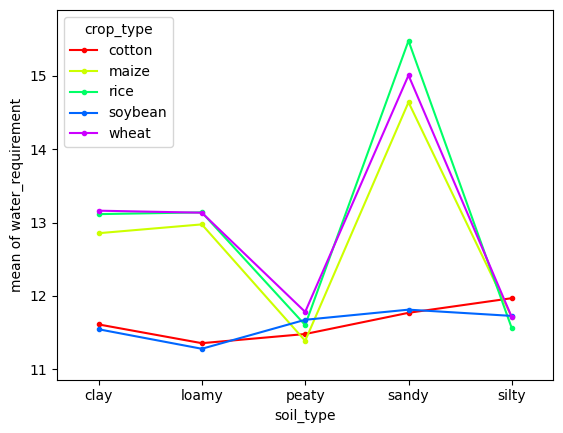

In [38]:
#Explore the interaction between two features and their effect on the target variable.
from statsmodels.graphics.factorplots import interaction_plot

interaction_plot(df['soil_type'], df['crop_type'], df['water_requirement'])
plt.show()


### <font color='blue'> for sandy soil water requirement is very for rice, maize and wheat and very low for cotton and soyabean
### <font color='blue'>from above graph we can infer that cotton and soyabean crop needs very less amount of water</font>

## <font color='green'> Categorical variable analysis

In [39]:
for col in categorical_columns:
    df[col].value_counts()
    

# <font color='green'> Training different type of regression models, evaluating it and fine-tuning it

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


### <font color='green'> Data Preprocessing <font>

In [41]:
df

temperature   humidity  wind_speed  evapotranspiration rainfall_pattern   
0       24.363503  49.891265   11.084976            6.743301         moderate  \
1       38.767858  46.632968    3.175424            5.133632              low   
2       33.299849  34.092313    5.526276            9.680487              low   
3       29.966462  68.581334   10.117569            2.970806              low   
4       18.900466  58.129933    7.490295            6.290708              low   
...           ...        ...         ...                 ...              ...   
9995    36.441400  82.622318   19.045509            8.032271         moderate   
9996    37.437721  32.808837   14.956484            8.116215              low   
9997    38.667698  48.221908    0.389117            4.156555         moderate   
9998    24.937200  56.599200    8.020097            5.474558         moderate   
9999    20.428510  40.335889    5.147960            5.899390             high   

     soil_type  soil_moisture_levels  water_retention_capacity   
0        sandy             19.897240                 35.673364  \
1        silty             19.440264                 46.812501   
2         clay             30.805983                 43.495237   
3         clay              5.105964                 44.601767   
4        sandy             38.141026                 10.108229   
...        ...                   ...                       ...   
9995     loamy             31.747844                 26.106453   
9996      clay             47.597710                 28.731312   
9997      clay             46.441333                 29.085087   
9998      clay             14.020896                 16.481613   
9999      clay              9.463352                 57.364348   

     drainage_properties crop_type  crop_water_requirement growth_stage   
0                   good     wheat               11.656577   vegetative  \
1                   poor      rice                5.141654     fruiting   
2                   good      rice                5.427771    flowering   
3                   good      rice                2.668952     seedling   
4                   good   soybean                3.652293   vegetative   
...                  ...       ...                     ...          ...   
9995                good     maize               15.084630     seedling   
9996                poor     maize                4.992290   vegetative   
9997                poor     wheat               13.740037   vegetative   
9998            moderate     wheat                3.225509     seedling   
9999                good      rice                3.960593   vegetative   

      water_requirement  
0             17.800000  
1             10.580000  
2             16.740000  
3              4.760000  
4              9.540000  
...                 ...  
9995          15.641018  
9996          10.341907  
9997          18.723048  
9998           6.158259  
9999           3.657213  

[20000 rows x 13 columns]

In [42]:
X = df.drop(columns=['water_requirement']) 

In [43]:
y=df.iloc[:,-1]

In [44]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
X_train.shape

(16000, 12)

In [47]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
X_train

array([[-0.10615677, -0.886793  , -1.59339272, ..., -0.89399573,
        -1.42012899, -1.79822978],
       [-1.15360149, -1.23357797, -0.60734648, ..., -1.65500508,
        -1.26055461, -1.79822978],
       [ 0.39908413, -0.44897898, -1.2423066 , ...,  1.38903231,
         0.45070442,  0.45267882],
       ...,
       [-1.23478539, -1.38446053, -1.07955041, ...,  1.38903231,
        -0.31854659, -1.79822978],
       [ 0.97762155,  1.74349663, -0.84655073, ..., -0.89399573,
         0.32532922, -1.23550263],
       [ 1.04573406, -0.86342483, -0.37683728, ..., -0.13298638,
         1.25961341,  1.01540597]])

### <font color='green'> Fine-Tunning of simple Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
model = LinearRegression()

# Define parameter grid for GridSearchCV
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

In [51]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)

In [52]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error', verbose=1)

In [53]:
print("Best Parameters:", grid_search.best_params_)

# Best estimator
best_model = grid_search.best_estimator_

# Predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Best Parameters: {'copy_X': True, 'fit_intercept': True}
Mean Squared Error: 4.331177581559441
R^2 Score: 0.821133978824338


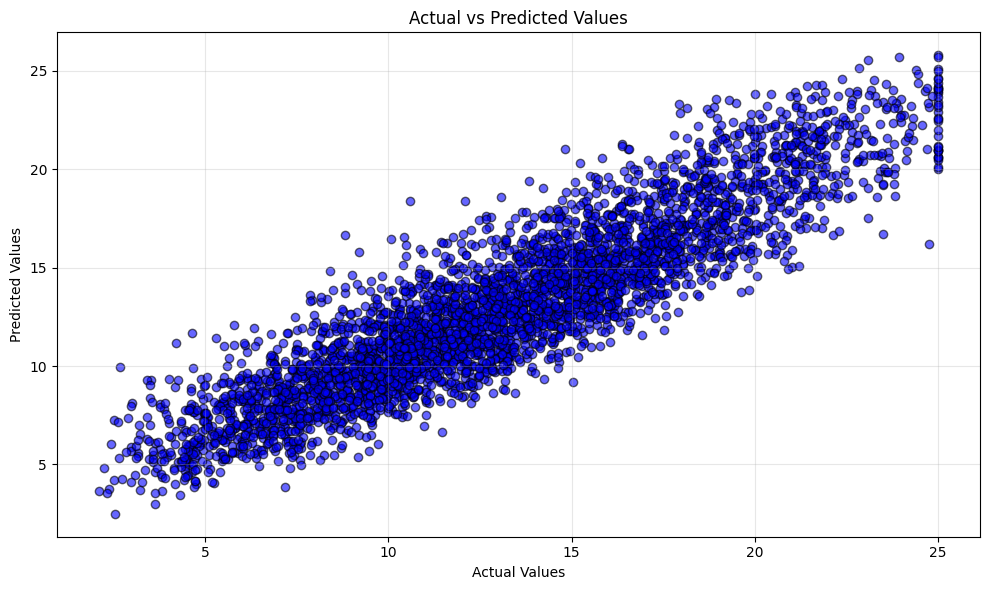

In [54]:
plt.figure(figsize=(10, 6))  # Set a larger figure size
plt.scatter(y_test, y_pred, alpha=0.6, c='blue', edgecolor='k', label='Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Random Forest Regressor
rf_params = {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]}
rf = RandomForestRegressor()
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring="neg_mean_squared_error")
rf_grid.fit(X_train, y_train)
rf_best = {
    "best_estimator": rf_grid.best_estimator_,
    "best_params": rf_grid.best_params_,
    "best_score": rf_grid.best_score_
}
# Predictions on test set
rf_predictions = rf_best["best_estimator"].predict(X_test)

# Evaluate metrics for Random Forest
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("\nRandom Forest Regressor:")
print("Best Parameters:", rf_best["best_params"])
print("Negative MSE (Cross-Validation):", -rf_best["best_score"])
print(f"MSE: {rf_mse:.4f}, MAE: {rf_mae:.4f}, R²: {rf_r2:.4f}")


Random Forest Regressor:
Best Parameters: {'max_depth': 20, 'n_estimators': 200}
Negative MSE (Cross-Validation): 1.454471519344138
MSE: 1.3318, MAE: 0.8204, R²: 0.9450


In [56]:
# Predictions on the training set
rf_train_predictions = rf_best["best_estimator"].predict(X_train)

# Evaluate metrics for training data
rf_train_mse = mean_squared_error(y_train, rf_train_predictions)
rf_train_mae = mean_absolute_error(y_train, rf_train_predictions)
rf_train_r2 = r2_score(y_train, rf_train_predictions)

print("\nTraining Metrics:")
print(f"MSE: {rf_train_mse:.4f}, MAE: {rf_train_mae:.4f}, R²: {rf_train_r2:.4f}")

print("\nTest Metrics:")
print(f"MSE: {rf_mse:.4f}, MAE: {rf_mae:.4f}, R²: {rf_r2:.4f}")



Training Metrics:
MSE: 0.1945, MAE: 0.3140, R²: 0.9922

Test Metrics:
MSE: 1.3318, MAE: 0.8204, R²: 0.9450


In [58]:
import joblib
rf = RandomForestRegressor(max_depth=20, n_estimators=200)

# Train the model with the best parameters
rf.fit(X_train, y_train)

model_filename = "rf_regressor_model_joblib.pkl"
joblib.dump(rf, model_filename)

['rf_regressor_model_joblib.pkl']